<a href="https://colab.research.google.com/github/kumar1607/Deep-CNN-Autoencoder---Image-Compression/blob/main/Deep_CNN_Autoencoder_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

In the context of deep CNN autoencoders for image compression:

# Max Pooling (Encoder):

Shrinks image size: Reduces image dimensions while keeping the most prominent features (like edges). This compresses the data for efficient storage/transmission.

# Up Sampling (Decoder):

Expands image size: Increases the dimensions back to the original size. However, due to compression, some information loss might occur. The decoder tries to reconstruct the image using the compressed representation.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist


# Flow of Autoencoder

Input Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Input Image



Downloading dataset

In [3]:

(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:

# normalizing the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:

# reshaping the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

#Exploratory Data Analysis

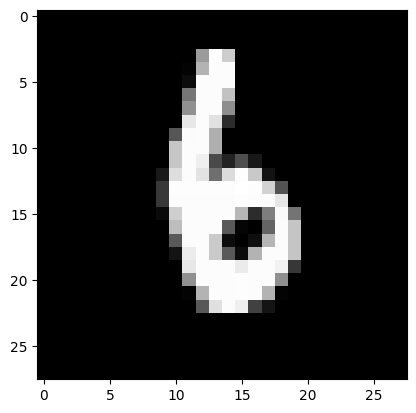

In [6]:

# randomly select the input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

# Model Creation

In [7]:

model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)        0

In [8]:
# train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 8s 13ms/step - loss: 0.1675 - val_loss: 0.0872
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0831 - val_loss: 0.0786
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0779 - val_loss: 0.0757
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0756 - val_loss: 0.0739
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0741 - val_loss: 0.0731
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0731 - val_loss: 0.0720
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0723 - val_loss: 0.0713
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0717 - val_loss: 0.0709
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0711 - val_loss: 0.0703
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0707 - val_loss: 0.069

#Visualize the Results

In [9]:

# predict the results from model (get compressed images)
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


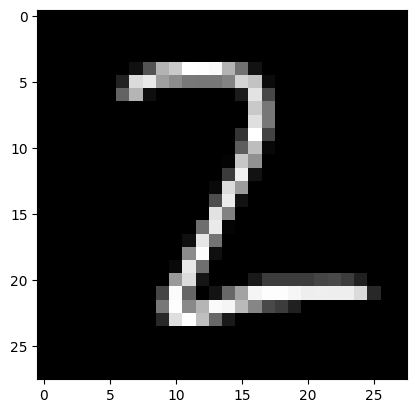

In [10]:

# randomly selecting input image
index = np.random.randint(len(x_test))
# plotting the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

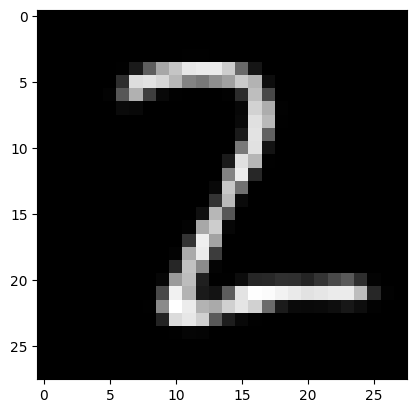

In [11]:
# visualizing compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

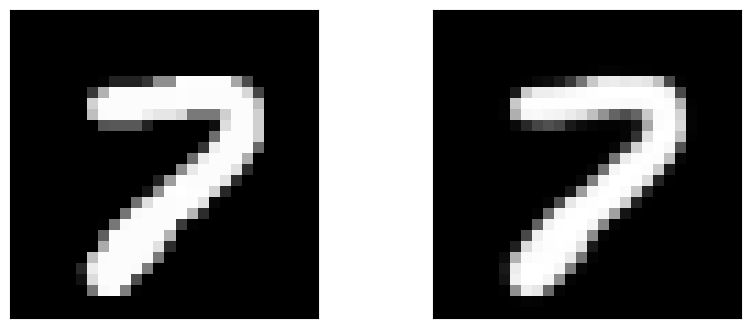

In [14]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

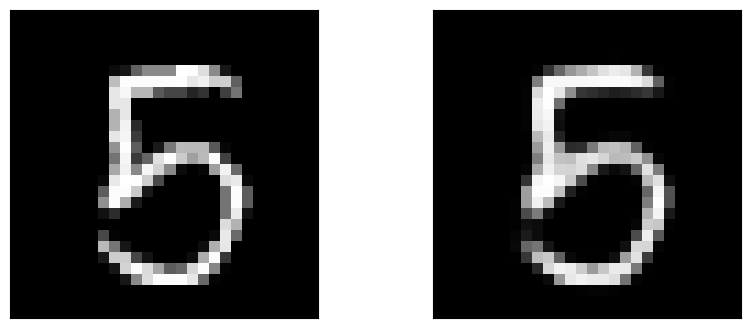

In [13]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()